In [1]:
%reset -f

In [2]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='ticks',
        font='sans-serif', font_scale=1, color_codes=True, rc={"lines.linewidth": 2})

from updec.utils import polyharmonic, multiquadric
from updec.operators import *

In [3]:
RBF = polyharmonic      ## Can define which rbf to use
MAX_DEGREE = 2

cloud = Cloud()
# cloud.print_cloud_properties()

In [4]:
## Operates on radial basis functions and polynomials at position x: don't forget the None. It is important!
def my_diff_operator(x, node=None, monomial=None):
    return  -1 * nodal_laplacian(x, node, monomial, rbf=RBF)

known_field = jnp.ones((cloud.N, 2))
## Operates on entire fields at position x (inside node)
def my_rhs_operator(x):
    # return divergence(x, known_field, cloud, rbf=RBF, max_degree=2)
    return 20.0

all_surfaces = np.unique(list(cloud.surfaces.values()))
all_surfaces = all_surfaces[all_surfaces != 0]   ## 0 (false) is NOT a surface
print("All the surfaces ids:", all_surfaces)

boundary_conditions = {}
for i in all_surfaces:
    if cloud.surface_types[i] == "dirichlet":
        boundary_conditions[i] = lambda node: 1.
    elif cloud.surface_types[i] == "neumann":
        boundary_conditions[i] = lambda node: 0.

All the surfaces ids: [1 2 3 4]


In [5]:
unknown_field = pde_solver(my_diff_operator, my_rhs_operator, cloud, boundary_conditions, RBF, MAX_DEGREE)
# unknown_field

[[ 2.51940796e+02 -6.04094200e+01  5.57758856e+00 ... -2.63923264e+00
   1.10901260e+00  2.51639366e+00]
 [-6.12191086e+01  2.53108429e+02 -6.12192612e+01 ...  2.15162563e+00
  -2.49283695e+00  2.15141106e+00]
 [ 5.57517624e+00 -6.04101791e+01  2.51941833e+02 ...  2.51636696e+00
   1.10808372e+00 -2.63778305e+00]
 ...
 [ 1.16735697e-04  2.45398915e-05  4.52511013e-05 ...  1.00000203e+00
   1.73370245e-06  1.90734863e-06]
 [ 2.54511833e-05 -1.32666755e-05  4.67523932e-05 ...  0.00000000e+00
   9.99997020e-01  9.05990601e-06]
 [ 3.01301479e-05  2.97506558e-05 -2.01724470e-05 ...  2.74181366e-06
  -2.82519977e-07  9.99998569e-01]]
[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]


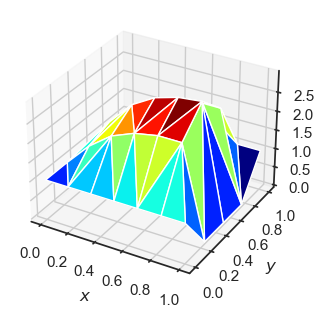

In [12]:
cloud.visualize_field(unknown_field, cmap="jet", projection="3d", ax=None, figsize=(8,8));